In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
# from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
author_data=pd.read_csv("author_data.csv")
author_data.head()

,id,gender,age,topic,sign,grupo_edad,Freq
0,2059027,male,15,Student,Leo,A,4
1,3581210,male,33,InvestmentBanking,Aquarius,C,70
2,3539003,female,14,indUnk,Aries,A,21
3,4172416,female,25,indUnk,Capricorn,B,2
4,3668238,female,17,Student,Gemini,A,10


# Clustering

In [3]:
topics_enc=pd.get_dummies(author_data.topic).astype("float64")
# gender_enc=pd.get_dummies(author_data.gender).astype("float64")
age_gr_enc=pd.get_dummies(author_data.grupo_edad).astype("float64")

In [4]:
encoded_authors=age_gr_enc.join(topics_enc)
# encoded_authors=gender_enc.join(encoded_authors)
encoded_authors.head()

,A,B,C,Accounting,Advertising,Agriculture,Architecture,Arts,Automotive,Banking,...,RealEstate,Religion,Science,Sports-Recreation,Student,Technology,Telecommunications,Tourism,Transportation,indUnk
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# auth_ward_full=hierarchy.linkage(encoded_authors, 'ward')

In [6]:
# plt.figure(figsize=(15,35))
# dn_tf_full = hierarchy.dendrogram(auth_ward_full,orientation="left")
# plt.title('Ward Link Dendrogram')
# plt.show()

In [7]:
# 3d Embedding for visualization
spect_emb_3=manifold.SpectralEmbedding(n_components=3, n_jobs=-1).fit_transform(encoded_authors)

In [8]:
auth_ward_3=hierarchy.linkage(spect_emb_3, 'ward')

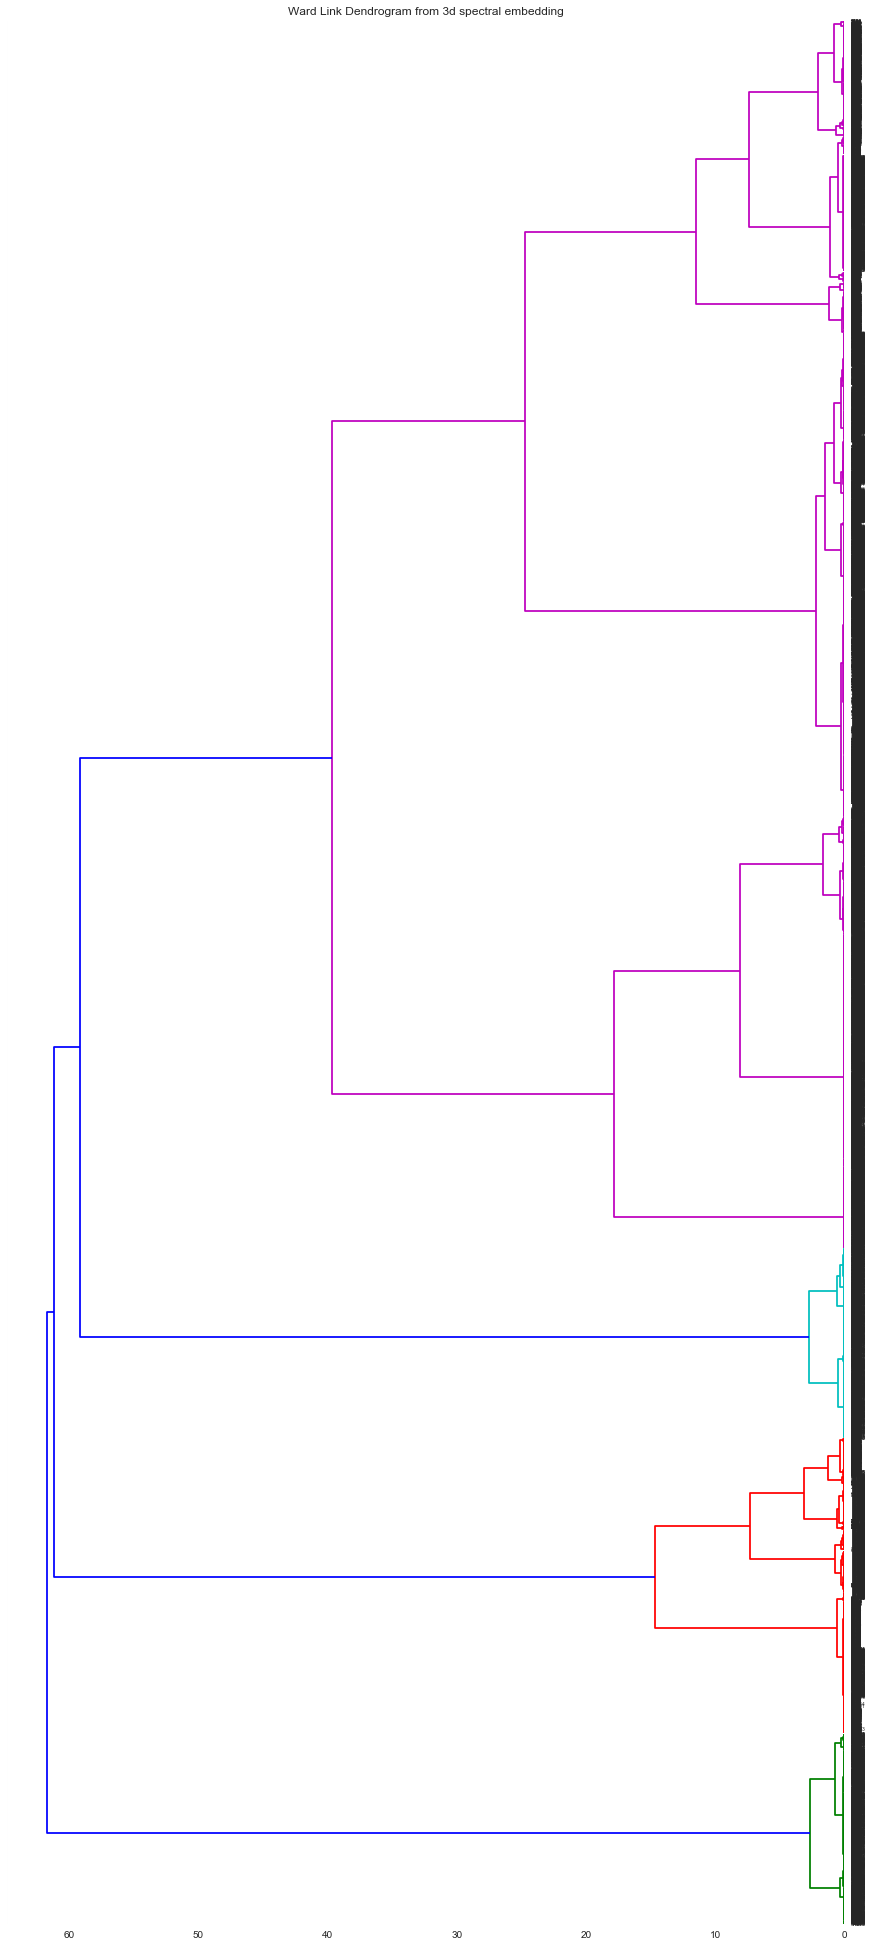

In [9]:
plt.figure(figsize=(15,35))
dn_tf_3=hierarchy.dendrogram(auth_ward_3,orientation="left")
plt.title('Ward Link Dendrogram from 3d spectral embedding')
plt.show()

In [10]:
clustering_3d_ward = AgglomerativeClustering(linkage='ward', n_clusters=5)
clustering_3d_ward.fit(spect_emb_3)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x000001E13029DA60>)

In [11]:
pd.crosstab(index=clustering_3d_ward.labels_, columns="count")

col_0,count
row_0,
0,7935
1,4305
2,2945
3,1898
4,1898


In [12]:
spect_emb_3=spect_emb_3*1000

Text(0.5,1,'2d spectral coordinates from 3d spectral hierarchical (ward) clustering')

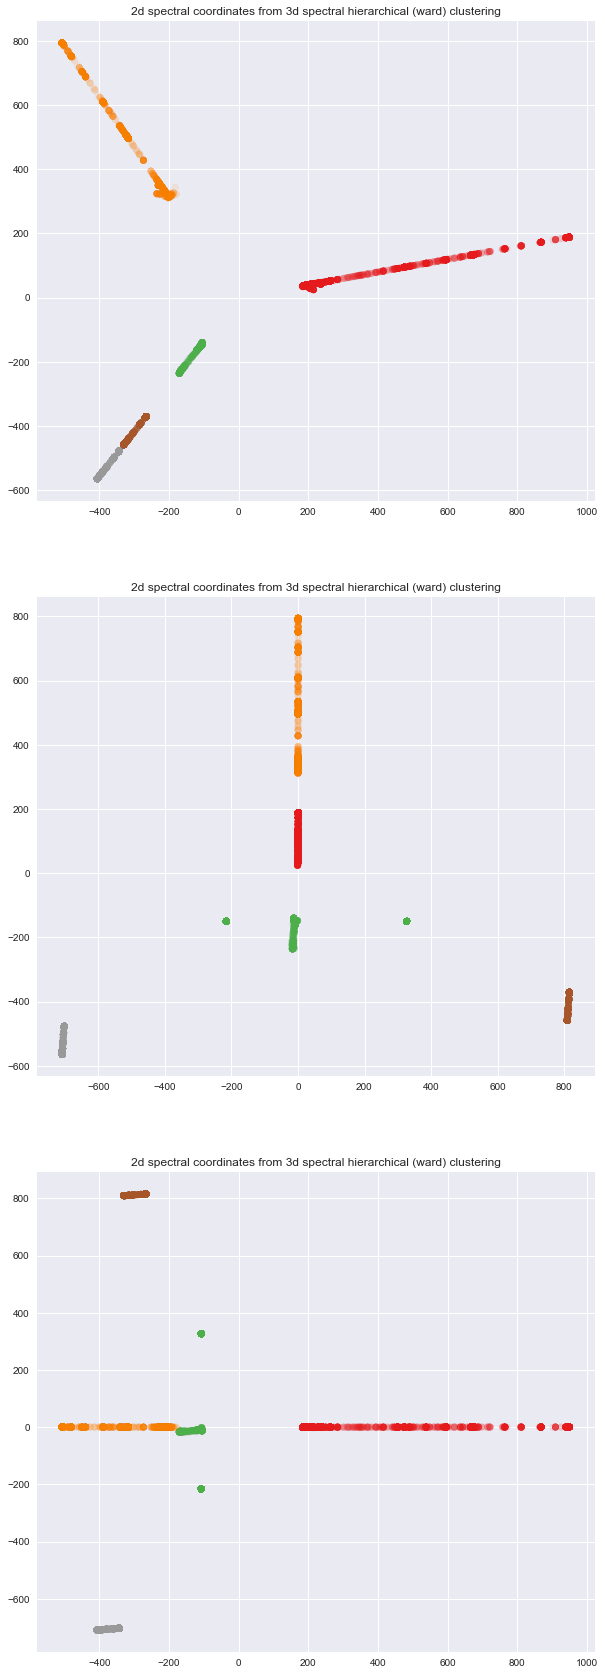

In [13]:
plt.figure(figsize=(10,30))
par_alf=0.1
plt.subplot(311)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,1], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(312)
plt.scatter(spect_emb_3[:,2],spect_emb_3[:,1], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(313)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,2], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

Making animation
Saving Movie File


MovieWriter imagemagick unavailable.


Saving animated GIF File


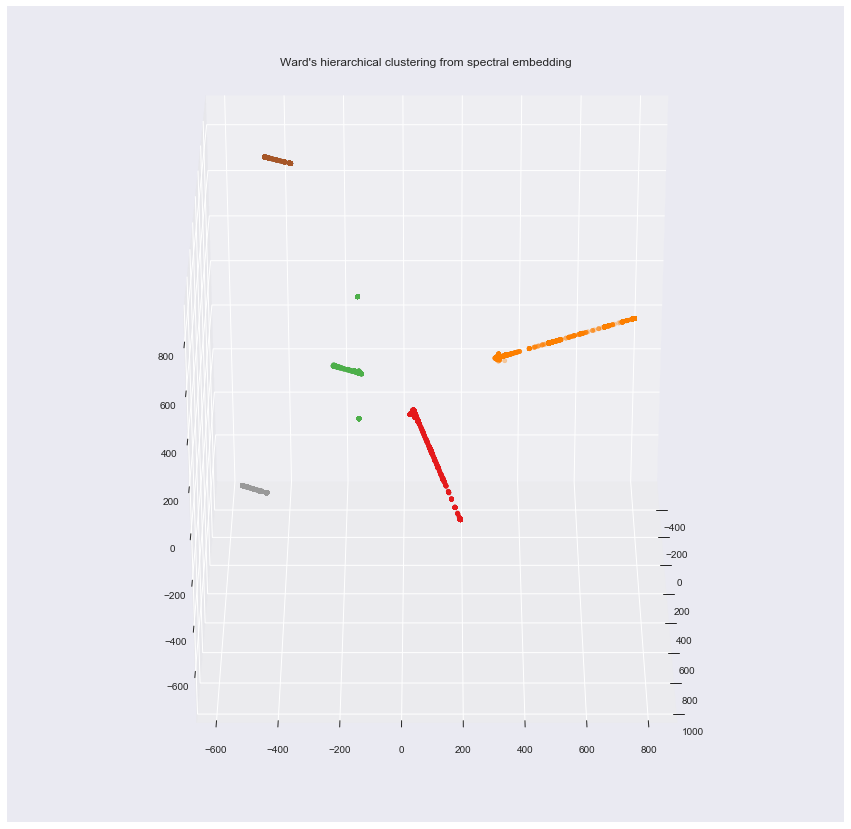

In [14]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c=clustering_3d_ward.labels_, 
           alpha=0.35,
           cmap=plt.cm.Set1)
plt.title("Ward's hierarchical clustering from spectral embedding" )
# plt.axis('off') # remove axes for visual appeal

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
print("Saving Movie File")
rot_animation.save('cluster_anim.mp4', writer=writer)
print("Saving animated GIF File")
rot_animation.save('whljgr_clustering.gif', dpi=80, writer='imagemagick')

In [15]:
author_data["cluster"]=clustering_3d_ward.labels_
author_data["embd_x_coord"]=spect_emb_3[:,0]
author_data["embd_y_coord"]=spect_emb_3[:,1]
author_data["embd_z_coord"]=spect_emb_3[:,2]

In [16]:
author_data.head(30)

,id,gender,age,topic,sign,grupo_edad,Freq,cluster,embd_x_coord,embd_y_coord,embd_z_coord
0,2059027,male,15,Student,Leo,A,4,4,-370.004990,-514.962081,-705.619464
1,3581210,male,33,InvestmentBanking,Aquarius,C,70,2,-284.723459,446.232749,0.308018
2,3539003,female,14,indUnk,Aries,A,21,1,-107.584450,-149.911271,326.585100
3,4172416,female,25,indUnk,Capricorn,B,2,0,597.996564,119.371355,0.471126
4,3668238,female,17,Student,Gemini,A,10,1,-107.364177,-149.441050,-215.831901
5,4030905,female,17,Student,Aries,A,25,4,-366.572286,-510.249764,-705.317611
6,4198080,female,23,indUnk,Aquarius,B,1,0,455.648378,90.928000,0.387310
7,3705830,male,25,Non-Profit,Cancer,B,46,0,201.119700,40.767722,0.119485
8,3649763,female,33,Banking,Aquarius,C,13,2,-284.726081,446.255199,0.308668
9,3389918,female,37,indUnk,Aquarius,C,19,2,-412.855508,647.298802,0.462280


In [17]:
author_data.to_csv("author_data_clusters.csv")

# Explore Clusters

In [18]:
pd.crosstab(index=author_data.topic, columns=author_data.cluster)

cluster,0,1,2,3,4
topic,,,,,
Accounting,73,10,20,0,0
Advertising,105,5,31,0,0
Agriculture,13,16,7,0,0
Architecture,45,9,14,0,0
Arts,355,193,161,0,0
Automotive,30,12,11,0,0
Banking,83,3,21,0,0
Biotech,27,18,9,0,0
BusinessServices,100,24,37,0,0


In [19]:
pd.crosstab(index=author_data.grupo_edad, columns=author_data.cluster)

cluster,0,1,2,3,4
grupo_edad,,,,,
A,0,4305,0,1898,1898
B,7935,0,0,0,0
C,0,0,2945,0,0


In [20]:
pd.crosstab(index=[author_data.topic,author_data.grupo_edad], columns=author_data.cluster)

cluster                           0     1     2     3     4
topic              grupo_edad                              
Accounting         A              0    10     0     0     0
                   B             73     0     0     0     0
                   C              0     0    20     0     0
Advertising        A              0     5     0     0     0
                   B            105     0     0     0     0
                   C              0     0    31     0     0
Agriculture        A              0    16     0     0     0
                   B             13     0     0     0     0
                   C              0     0     7     0     0
Architecture       A              0     9     0     0     0
                   B             45     0     0     0     0
                   C              0     0    14     0     0
Arts               A              0   193     0     0     0
                   B            355     0     0     0     0
                   C              0     0   161     0     0
Automotive         A              0    12     0     0     0
                   B             30     0     0     0     0
                   C              0     0    11     0     0
Banking            A              0     3     0     0     0
                   B             83     0     0     0     0
                   C              0     0    21     0     0
Biotech            A              0    18     0     0     0
                   B             27     0     0     0     0
                   C              0     0     9     0     0
BusinessServices   A              0    24     0     0     0
                   B            100     0     0     0     0
                   C              0     0    37     0     0
Chemicals          A              0    27     0     0     0
                   B             29     0     0     0     0
                   C              0     0     5     0     0
...                             ...   ...   ...   ...   ...
RealEstate         A              0     7     0     0     0
                   B             32     0     0     0     0
                   C              0     0    12     0     0
Religion           A              0    24     0     0     0
                   B             68     0     0     0     0
                   C              0     0    42     0     0
Science            A              0    23     0     0     0
                   B            132     0     0     0     0
                   C              0     0    26     0     0
Sports-Recreation  A              0    38     0     0     0
                   B             39     0     0     0     0
                   C              0     0    10     0     0
Student            A              0  2253     0     0  1898
                   B            838     0     0     0     0
                   C              0     0    54     0     0
Technology         A              0    70     0     0     0
                   B            591     0     0     0     0
                   C              0     0   270     0     0
Telecommunications A              0     6     0     0     0
                   B             73     0     0     0     0
                   C              0     0    37     0     0
Tourism            A              0    14     0     0     0
                   B             55     0     0     0     0
                   C              0     0    22     0     0
Transportation     A              0     9     0     0     0
                   B             41     0     0     0     0
                   C              0     0    40     0     0
indUnk             A              0   893     0  1898     0
                   B           2799     0     0     0     0
                   C              0     0  1122     0     0

[120 rows x 5 columns]

In [21]:
centroides_median=np.array([[np.median(author_data.loc[author_data.cluster==clst,"embd_x_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_y_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_z_coord"])]
 for clst in list(set(author_data.cluster))])

In [22]:
enumerate(list(set(author_data.cluster)))

Text(0.5,0.92,"Ward's hierarchical clustering from spectral embedding")

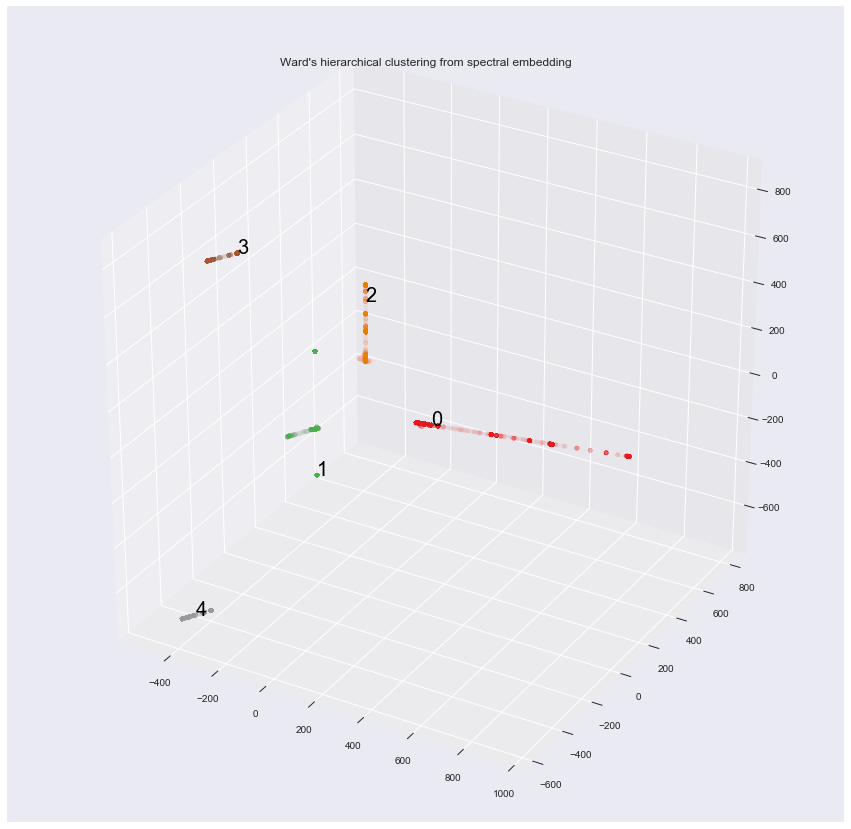

In [23]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c=clustering_3d_ward.labels_, 
           alpha=0.01,
           cmap=plt.cm.Set1)

# ax.scatter(xs=centroides_median[:,0],
#            ys=centroides_median[:,1],
#            zs=centroides_median[:,2], 
#            s=500)

for i, txt in enumerate(list(set(author_data.cluster))):
    ax.text(centroides_median[i,0],
            centroides_median[i,1],
            centroides_median[i,2],
            '%s' % (str(txt)), size=20, zorder=1, color='k')

plt.title("Ward's hierarchical clustering from spectral embedding" )